In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset
License(s): other
 98% 347M/355M [00:02<00:00, 186MB/s]
100% 355M/355M [00:02<00:00, 159MB/s]


In [ ]:
!mkdir -p /content/indian_food_images_temp
!unzip indian-food-images-dataset.zip -d /content/indian_food_images_temp

Archive:  indian-food-images-dataset.zip
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/02d09e872d.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/02f2e49039.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/06c639bab2.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/08b8f8efc1.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/09a37d7cc7.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/0cd70ffc10.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/0d09b0e580.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian Food Images/adhirasam/0e84c2b7fd.jpg  
  inflating: /content/indian_food_images_temp/Indian Food Images/Indian

In [ ]:
import os

dataset_temp_dir = '/content/indian_food_images_temp/Indian Food Images/Indian Food Images'

for root, dirs, files in os.walk(dataset_temp_dir):
    level = root.replace(dataset_temp_dir, '').count(os.sep)
    indent = ' ' * 2 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # Print first 5 files in each subdirectory for preview
        print('{}{}'.format(subindent, f))

Indian Food Images/
  aloo_shimla_mirch/
    26de0a0e37.jpg
    36d3128094.jpg
    35ef94c216.jpg
    9fef927573.jpg
    2c3eb19b7d.jpg
  chicken_tikka/
    2b3d210c90.jpg
    22d4087443.jpg
    3a6fa8e35b.jpg
    1cbd6bce10.jpg
    1d27d9a45b.jpg
  gajar_ka_halwa/
    5c6f520559.jpg
    4c7d032045.jpg
    7e03780b90.jpg
    0b18223d3f.jpg
    2d948fcff4.jpg
  rasgulla/
    014ce94539.jpg
    67a0b5d362.jpg
    2fff4054b6.jpg
    3e474c7fa0.jpg
    70b595e1ac.jpg
  unni_appam/
    1da4eb7584.jpg
    3d396c1d4a.jpg
    1afb983d86.jpg
    1dc527442b.jpg
    5c92a8dacc.jpg
  aloo_matar/
    34a9630f01.jpg
    5bd4b9eacd.jpg
    1aa0bfd414.jpg
    5e0e8735cf.jpg
    9dcac3cc68.jpg
  cham_cham/
    4cb9c5d8fc.jpg
    4f50533a23.jpg
    1c5048eebd.jpg
    3dc7d33f27.jpg
    4f4b38bde4.jpg
  sheera/
    43cd458ac5.jpg
    4d2400684c.jpg
    71cf767066.jpg
    5f1d88c738.jpg
    5f73b643d1.jpg
  basundi/
    6f7ce485be.jpg
    8c9522d5e4.jpg
    52fa0ae6a9.jpg
    6ff7890373.jpg
    7ffbde2364

In [ ]:
!mkdir -p /content/indian_food_images
!mv /content/indian_food_images_temp/Indian\ Food\ Images/Indian\ Food\ Images/* /content/indian_food_images/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset directory
dataset_dir = '/content/indian_food_images'

# Create ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    validation_split=0.2       # Splitting data into training (80%) and validation (20%)
)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),    # Resizes all images to 224x224
    batch_size=32,             # Number of images to yield from the generator in each batch
    class_mode='categorical',  # Determines the type of label arrays that are returned (one-hot encoded)
    subset='training'          # Specifies if this generator is used for training or validation
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print class indices to verify
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class names:", class_names)

Found 3200 images belonging to 80 classes.
Found 800 images belonging to 80 classes.
Class names: ['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'ph

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set dataset directory
dataset_dir = '/content/indian_food_images'

# Create ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    validation_split=0.2       # Splitting data into training (80%) and validation (20%)
)

In [ ]:
# Load training and validation data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),    # Resizes all images to 224x224
    batch_size=32,             # Number of images to yield from the generator in each batch
    class_mode='categorical',  # Determines the type of label arrays that are returned (one-hot encoded)
    subset='training'          # Specifies if this generator is used for training or validation
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 80 classes.
Found 800 images belonging to 80 classes.


In [ ]:
# Print class indices to verify
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class names:", class_names)

Class names: ['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Initialize a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
100/100 [==============================] - 405s 4s/step - loss: 4.4606 - accuracy: 0.0088 - val_loss: 4.3820 - val_accuracy: 0.0125
Epoch 2/10
100/100 [==============================] - 395s 4s/step - loss: 4.3801 - accuracy: 0.0159 - val_loss: 4.3407 - val_accuracy: 0.0175
Epoch 3/10
100/100 [==============================] - 407s 4s/step - loss: 4.3198 - accuracy: 0.0259 - val_loss: 4.2402 - val_accuracy: 0.0437
Epoch 4/10
100/100 [==============================] - 406s 4s/step - loss: 4.0846 - accuracy: 0.0697 - val_loss: 4.1248 - val_accuracy: 0.0737
Epoch 5/10
100/100 [==============================] - 392s 4s/step - loss: 3.6240 - accuracy: 0.1525 - val_loss: 4.0519 - val_accuracy: 0.1100
Epoch 6/10
100/100 [==============================] - 398s 4s/step - loss: 3.0160 - accuracy: 0.2822 - val_loss: 4.0262 - val_accuracy: 0.1562
Epoch 7/10
100/100 [==============================] - 417s 4s/step - loss: 2.3465 - accuracy: 0.4206 - val_loss: 4.0863 - val_accuracy: 0.1825

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

25/25 [==============================] - 30s 1s/step - loss: 4.5644 - accuracy: 0.2412
Validation Accuracy: 24.12%


In [ ]:
model.save('indian_food_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
!pip install tensorflow

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import tensorflow as tf
import numpy as np

# Load model
model = tf.keras.models.load_model('indian_food_classifier.h5')

# Define class names and calorie values
class_names = [
    'adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki',
    'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi',
    'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri',
    'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma',
    'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha',
    'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori',
    'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta',
    'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol',
    'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak',
    'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha',
    'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'rasgulla', 'sandesh',
    'shankarpali', 'sheer_korma', 'sheera', 'shrikhand', 'sohan_halwa', 'sohan_papdi', 'sutar_feni',
    'unni_appam'
]
  # Replace with your class names
calorie_values = {
    'adhirasam': 250,
    'aloo_gobi': 150,
    'aloo_matar': 180,
    'aloo_methi': 160,
    'aloo_shimla_mirch': 140,
    'aloo_tikki': 120,
    'anarsa': 200,
    'ariselu': 220,
    'bandar_laddu': 300,
    'basundi': 250,
    'bhatura': 180,
    'bhindi_masala': 160,
    'biryani': 300,
    'boondi': 120,
    'butter_chicken': 350,
    'chak_hao_kheer': 200,
    'cham_cham': 180,
    'chana_masala': 220,
    'chapati': 70,
    'chhena_kheeri': 280,
    'chicken_razala': 320,
    'chicken_tikka': 300,
    'chicken_tikka_masala': 350,
    'chikki': 150,
    'daal_baati_churma': 320,
    'daal_puri': 200,
    'dal_makhani': 250,
    'dal_tadka': 230,
    'dharwad_pedha': 180,
    'doodhpak': 200,
    'double_ka_meetha': 280,
    'dum_aloo': 220,
    'gajar_ka_halwa': 300,
    'gavvalu': 180,
    'ghevar': 250,
    'gulab_jamun': 250,
    'imarti': 200,
    'jalebi': 220,
    'kachori': 180,
    'kadai_paneer': 280,
    'kadhi_pakoda': 200,
    'kajjikaya': 220,
    'kakinada_khaja': 180,
    'kalakand': 240,
    'karela_bharta': 150,
    'kofta': 200,
    'kuzhi_paniyaram': 160,
    'lassi': 120,
    'ledikeni': 250,
    'litti_chokha': 280,
    'lyangcha': 220,
    'maach_jhol': 300,
    'makki_di_roti_sarson_da_saag': 220,
    'malapua': 180,
    'misi_roti': 150,
    'misti_doi': 160,
    'modak': 200,
    'mysore_pak': 300,
    'naan': 180,
    'navrattan_korma': 250,
    'palak_paneer': 280,
    'paneer_butter_masala': 300,
    'phirni': 200,
    'pithe': 220,
    'poha': 150,
    'poornalu': 180,
    'pootharekulu': 200,
    'qubani_ka_meetha': 250,
    'rabri': 220,
    'ras_malai': 280,
    'rasgulla': 200,
    'sandesh': 180,
    'shankarpali': 160,
    'sheer_korma': 250,
    'sheera': 180,
    'shrikhand': 200,
    'sohan_halwa': 220,
    'sohan_papdi': 180,
    'sutar_feni': 250,
    'unni_appam': 160
}

In [51]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

FileUpload(value={}, description='Upload')

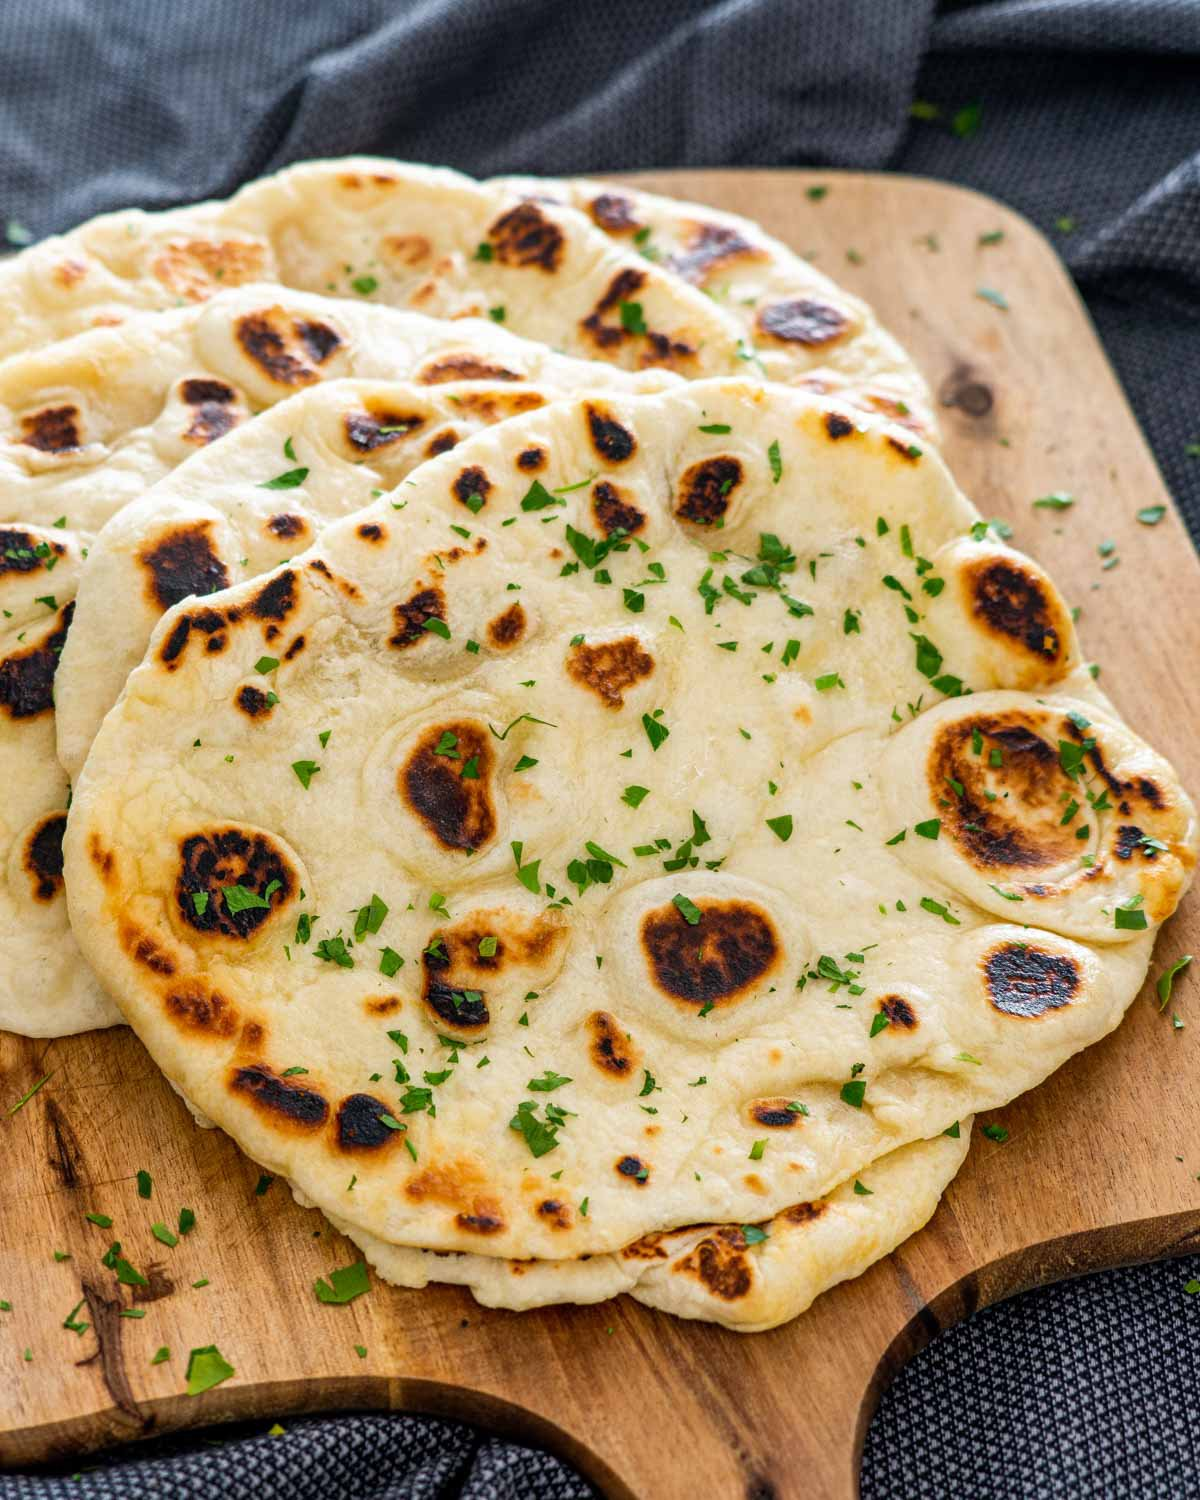

1/1 [==============================] - 0s 51ms/step
Predictions shape: (1, 80)
Predictions values: [[1.7712813e-05 5.1724998e-04 1.0178804e-03 4.7132564e-03 6.1785807e-03
  2.1226471e-03 4.7987562e-02 2.4583528e-04 1.7788271e-04 4.4601254e-02
  5.0020493e-03 2.5251249e-03 5.9542805e-03 2.6766118e-03 1.4236379e-04
  2.5473665e-02 2.4316857e-02 2.5395771e-05 2.3078015e-02 3.0968456e-02
  3.2742128e-02 6.5227679e-05 1.5038220e-04 1.0511663e-03 7.4789498e-04
  1.7792387e-03 1.8283997e-02 8.5243909e-03 2.6812833e-03 9.0376020e-04
  1.1853811e-03 1.9320811e-04 1.4859765e-04 1.7363228e-03 4.0813051e-02
  1.6712630e-04 3.2438020e-06 2.5683394e-04 1.5205215e-04 1.6013323e-03
  1.7610703e-02 5.3761196e-03 8.0969827e-03 1.3074153e-02 1.3269524e-03
  2.8488316e-02 6.5014535e-03 1.8687330e-02 1.3145515e-04 2.8959103e-03
  7.7355583e-03 3.3956100e-04 2.7229451e-03 1.1829372e-03 5.3310595e-03
  1.8478917e-03 1.9327990e-03 2.5343391e-04 1.1044974e-01 2.1325212e-03
  6.0442194e-02 8.9301559e-04 9.28443

In [56]:
# Example function to handle file upload and predict
def handle_file_upload(change):
    uploaded_file = next(iter(upload_button.value.values()))
    image_path = './' + uploaded_file['metadata']['name']
    with open(image_path, 'wb') as f:
        f.write(uploaded_file['content'])

    # Display uploaded image
    display(Image(filename=image_path))

    # Preprocess image (assuming you have a preprocess_image function)
    img_array = preprocess_image(image_path)

    # Predict the class
    predictions = model.predict(img_array)
    print(f'Predictions shape: {predictions.shape}')  # Debug: Print predictions shape
    print(f'Predictions values: {predictions}')      # Debug: Print predictions values

    # Assuming predictions is (1, 80) and class_names is correctly defined
    if predictions.shape[1] == len(class_names):
        predicted_class_idx = np.argmax(predictions)
        if predicted_class_idx < len(class_names):
            predicted_class = class_names[predicted_class_idx]
            calorie_value = calorie_values.get(predicted_class, 'Calorie value not found')
            # Display prediction results
            print(f'Predicted Food Item: {predicted_class}')
            print(f'Calories: {calorie_value} grams per 100g')
        else:
            print('Error: Predicted class index out of range.')
    else:
        print(f'Error: Number of predictions ({predictions.shape[1]}) does not match number of classes ({len(class_names)}).')

# Assuming upload_button is a FileUpload widget
upload_button = widgets.FileUpload()
display(upload_button)

# Register the event handler to handle file upload
upload_button.observe(handle_file_upload, names='value')